In [2]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Load the network from a CSV file
csv_file_path = "data_random_graph.csv"  # Replace with your CSV file path
edge_df = pd.read_csv(csv_file_path,delimiter=" ")


# Create a graph from the CSV edge list
G = nx.from_pandas_edgelist(edge_df, 'source', 'target')
nx.set_node_attributes(G, "S", "state")  # Set all nodes as Susceptible

# Parameters for simulation
infection_prob = 0.3
recovery_prob = 0.1
threshold = 0.3  # 30% of nodes infected triggers misinformation recognition
initial_infected = [random.choice(list(G.nodes))]  # Start with node 1 infected

# Initialize infected nodes
for node in initial_infected:
    G.nodes[node]["state"] = "I"

# Prepare tracking lists
susceptible_counts, infected_counts, recovered_counts = [], [], []

# Simulation
for step in range(50):  # Run for 50 steps
    new_infected, new_recovered = [], []
    
    # Count current states
    infected_count = sum(1 for n in G.nodes if G.nodes[n]["state"] == "I")
    total_nodes = G.number_of_nodes()
    
    # Check if threshold is reached
    if infected_count / total_nodes >= threshold:
        # Start recovery process from the first infected node
        for node in initial_infected:
            if G.nodes[node]["state"] == "I":
                # Attempt to recover neighbors
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]["state"] == "S":
                        G.nodes[neighbor]["state"] = "R"
                        new_recovered.append(neighbor)

    # Regular infection and recovery process
    for node in G.nodes:
        if G.nodes[node]["state"] == "I":
            # Attempt to infect neighbors
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]["state"] == "S" and random.random() < infection_prob:
                    new_infected.append(neighbor)
            # Attempt recovery
            if random.random() < recovery_prob:
                new_recovered.append(node)

    # Update states
    for node in new_infected:
        G.nodes[node]["state"] = "I"
    for node in new_recovered:
        G.nodes[node]["state"] = "R"    
        
    # Track counts
    susceptible_counts.append(sum(1 for n in G.nodes if G.nodes[n]["state"] == "S"))
    infected_counts.append(sum(1 for n in G.nodes if G.nodes[n]["state"] == "I"))
    recovered_counts.append(sum(1 for n in G.nodes if G.nodes[n]["state"] == "R"))

# Plot results
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Node Count")
plt.legend()
plt.show()


KeyError: 'source'

In [20]:
# ... meglévő kód ...

# Check if threshold is reached
if infected_count / total_nodes >= threshold:
    # Start recovery process from the first infected node
    for node in initial_infected:
        if G.nodes[node]["state"] == "I":
            # Attempt to recover neighbors
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]["state"] == "S":
                    G.nodes[neighbor]["state"] = "R"
                    new_recovered.append(neighbor)

# Regular infection and recovery process
for node in G.nodes:
    if G.nodes[node]["state"] == "I":
        # Attempt to infect neighbors
        for neighbor in G.neighbors(node):
            if G.nodes[neighbor]["state"] == "S" and random.random() < infection_prob:
                new_infected.append(neighbor)
        # Attempt recovery
        if random.random() < recovery_prob:
            new_recovered.append(node)

# Update states
for node in new_infected:
    G.nodes[node]["state"] = "I"
for node in new_recovered:
    G.nodes[node]["state"] = "R"

# ... meglévő kód ...

In [11]:
# ... meglévő kód ...

# Check if threshold is reached
if infected_count / total_nodes >= threshold:
    # Convert infected nodes to recovered
    for node in G.nodes:
        if G.nodes[node]["state"] == "I":
            G.nodes[node]["state"] = "R"
        if G.nodes[node]["state"] == "R":
                # Attempt to recover neighbors
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]["state"] == "S":
                        G.nodes[node]["state"] = "R"
                        new_recovered.append(neighbor)
# Regular infection and recovery process
for node in G.nodes:
    if G.nodes[node]["state"] == "I":
        # Attempt to infect neighbors
        for neighbor in G.neighbors(node):
            if G.nodes[neighbor]["state"] == "S" and random.random() < infection_prob:
                new_infected.append(neighbor)
        # Attempt recovery
        #if random.random() < recovery_prob:
         #   new_recovered.append(node)
    
# Update states
for node in new_infected:
    G.nodes[node]["state"] = "I"
for node in new_recovered:
    G.nodes[node]["state"] = "R"

# ... meglévő kód ...

30


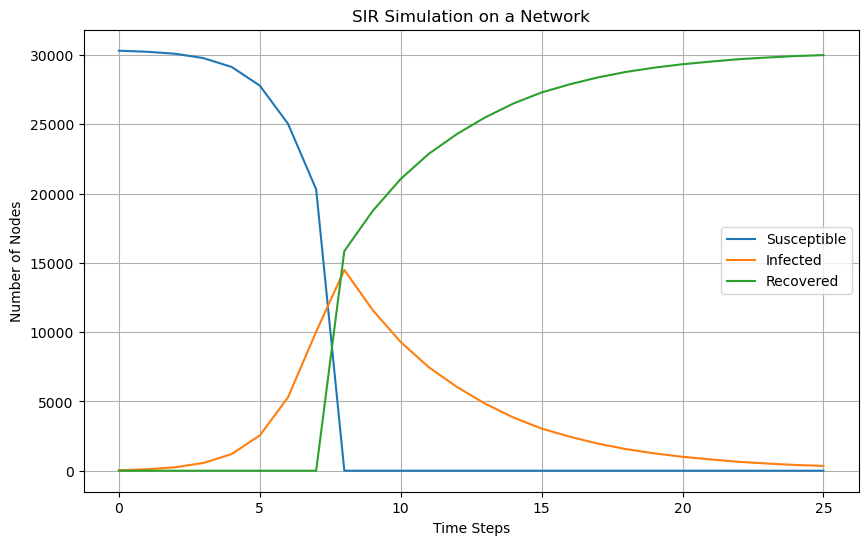

In [5]:
# Load the CSV file and create the graph
file_path = 'data\data_random_graph.csv'  # Update with the actual path to your file
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.2  # Recovery probability
initial_infected_fraction = 0.001  # Initial fraction of infected nodes
recovery_threshold = 0.3  # Threshold for recovery

# Initialize states
nodes = list(G.nodes)
n = len(nodes)
initial_infected = int(initial_infected_fraction * n)
infected_nodes = np.random.choice(nodes, initial_infected, replace=False)
node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
for node in infected_nodes:
    node_states[node] = 'I'
print(len(infected_nodes))

# Record initial state counts
susceptible_counts = [n - initial_infected]
infected_counts = [initial_infected]
recovered_counts = [0]

# Simulation loop
time_steps = 25# Adjust based on required duration
for t in range(time_steps):
    new_states = node_states.copy()
    for node in nodes:
        if node_states[node] == 'I':  # Infected node
            # Spread to neighbors
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' and np.random.rand() < beta:
                    new_states[neighbor] = 'I'
            # Recover
            if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                new_states[node] = 'R'
                recovery_threshold = 1
                for node in nodes:
                    if node_states[node] == 'S':
                        new_states[node] = 'R'
            if np.random.rand() < gamma and recovery_threshold == 1:
                new_states[node] = 'R'
    
    # Update states
    node_states = new_states
    susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
    infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
    recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
    
    # Break if no more infected
    if infected_counts[-1] == 0:
        break

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.title("SIR Simulation on a Network")
plt.legend()
plt.grid()
plt.show()

## Random case

0.19349367869256862


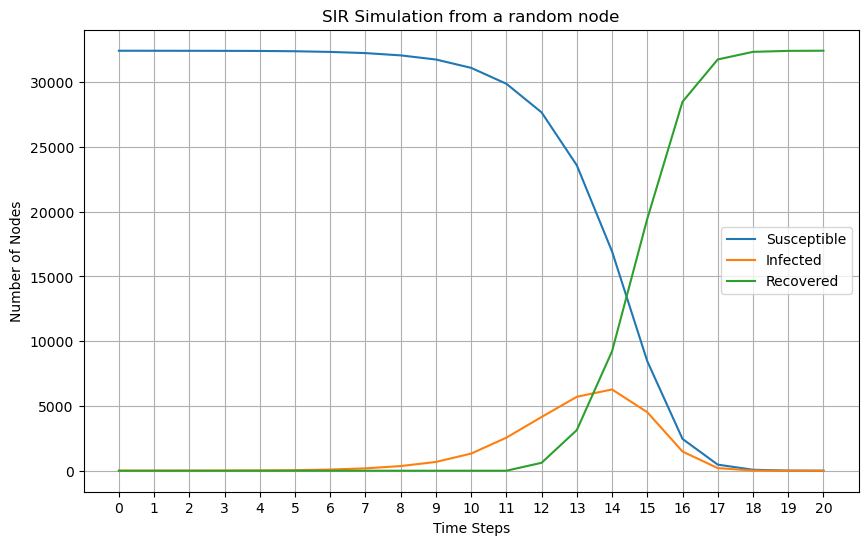

In [80]:
# Load the CSV file and create the graph
file_path = 'data\\final_final_random_graph.csv'  # Update with the actual path to your file
#file_path = 'data\data - fixed numbers.csv'
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23  # Recovery probability
#initial_infected_fraction = 0.001  # Initial fraction of infected nodes
recovery_threshold = 0.05  # Threshold for recovery

# Initialize states
nodes = list(G.nodes)
n = len(nodes)
initial_infected = 1
infected_nodes = np.random.choice(nodes, replace=False)
node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
#for node in infected_nodes:
node_states[infected_nodes] = 'I'


# Record initial state counts
susceptible_counts = [n - initial_infected]
infected_counts = [initial_infected]
recovered_counts = [0]

# Simulation loop
time_steps = 25# Adjust based on required duration
for t in range(time_steps):
    new_states = node_states.copy()
    for node in nodes:
        if node_states[node] == 'I':  # Infected node
            # Spread to neighbors
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' and np.random.rand() < beta:
                    new_states[neighbor] = 'I'
            # Recover
            if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                new_states[node] = 'R'
                continue
                
        if node_states[node] == 'R':        
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                    new_states[neighbor] = 'R'
                
            #if np.random.rand() < gamma and recovery_threshold == 1:
                #new_states[node] = 'R'
    
    # Update states
    node_states = new_states
    susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
    infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
    recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
    
    # Break if no more infected
    if infected_counts[-1] == 0:
        break
print(max(infected_counts)/n)
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.title("SIR Simulation from a random node")
plt.xticks(ticks=range(len(susceptible_counts))) 
plt.legend()
plt.grid()
plt.savefig("fig_case3_original.png")
plt.show()

## From highly connected node

0.21421523280912735


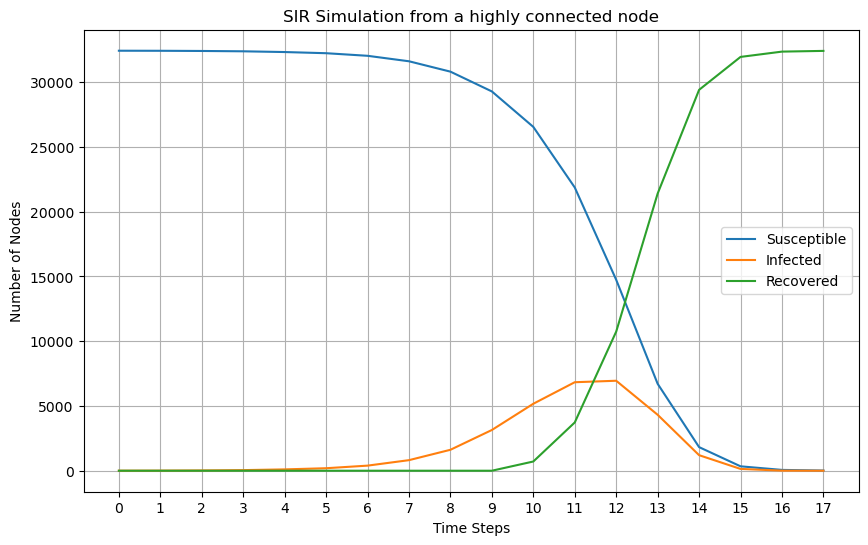

In [77]:
# Load the CSV file and create the graph
file_path = 'data\\final_final_random_graph.csv'  # Update with the actual path to your file
#file_path = 'data\data - fixed numbers.csv'
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23  # Recovery probability
#initial_infected_fraction = 0.001  # Initial fraction of infected nodes
recovery_threshold = 0.05  # Threshold for recovery

# Initialize states 
nodes = list(G.nodes)
n = len(nodes)
initial_infected = 1
#infected_nodes = np.random.choice(nodes, replace=False)
node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
#for node in infected_nodes:
#node_states[102] = 'I' #original network
node_states[8121] = 'I' #syntetic network
#print(infected_nodes)

# Record initial state counts
susceptible_counts = [n - initial_infected]
infected_counts = [initial_infected]
recovered_counts = [0]

# Simulation loop
time_steps = 25# Adjust based on required duration
for t in range(time_steps):
    new_states = node_states.copy()
    for node in nodes:
        if node_states[node] == 'I':  # Infected node
            # Spread to neighbors
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' and np.random.rand() < beta:
                    new_states[neighbor] = 'I'
            # Recover
            if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                new_states[node] = 'R'
                continue
                
        if node_states[node] == 'R':        
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                    new_states[neighbor] = 'R'
                
            #if np.random.rand() < gamma and recovery_threshold == 1:
                #new_states[node] = 'R'
    
    # Update states
    node_states = new_states
    susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
    infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
    recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
    
    # Break if no more infected
    if infected_counts[-1] == 0:
        break
print(max(infected_counts)/n)
# Plot results

plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.title("SIR Simulation from a highly connected node")
plt.xticks(ticks=range(len(susceptible_counts))) 
plt.legend()
plt.grid()
plt.savefig("fig_case1_syntetic.png")
plt.show()

## Losely connected node

0.5837187789084182


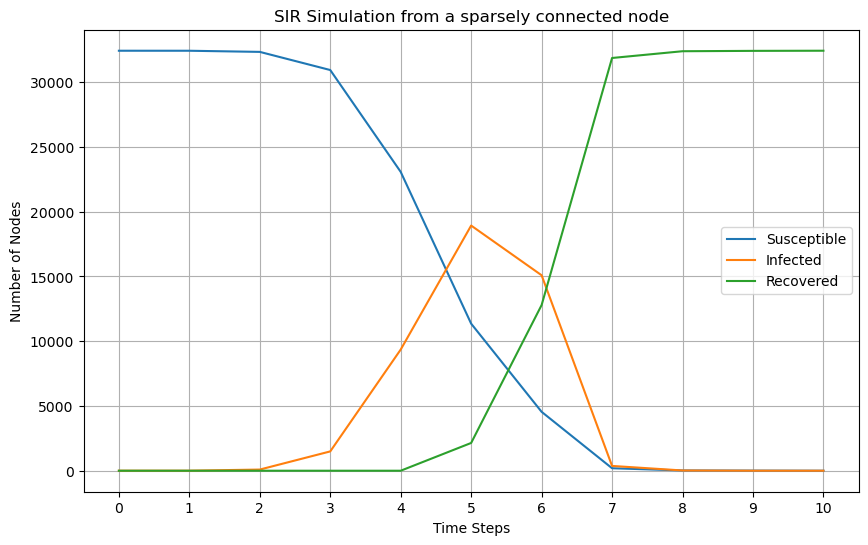

In [ ]:
# Load the CSV file and create the graph
#file_path = 'data\\final_final_random_graph.csv'  # Update with the actual path to your file
file_path = 'data\data - fixed numbers.csv'
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23  # Recovery probability
initial_infected_fraction = 0.001  # Initial fraction of infected nodes
recovery_threshold = 0.05  # Threshold for recovery

# Initialize states
nodes = list(G.nodes)
n = len(nodes)
initial_infected = 1
#infected_nodes = np.random.choice(nodes, replace=False)
node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
#for node in infected_nodes:
node_states[19242] = 'I'  #original network
#node_states[7] = 'I' #syntetic network
#print(infected_nodes)

# Record initial state counts
susceptible_counts = [n - initial_infected]
infected_counts = [initial_infected]
recovered_counts = [0]

# Simulation loop
time_steps = 50# Adjust based on required duration
for t in range(time_steps):
    new_states = node_states.copy()
    for node in nodes:
        if node_states[node] == 'I':  # Infected node
            # Spread to neighbors
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' and np.random.rand() < beta:
                    new_states[neighbor] = 'I'
            # Recover
            if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                new_states[node] = 'R'
                continue
                
        if node_states[node] == 'R':        
            for neighbor in G.neighbors(node):
                if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                    new_states[neighbor] = 'R'
                
            #if np.random.rand() < gamma and recovery_threshold == 1:
                #new_states[node] = 'R'
    
    # Update states
    node_states = new_states
    susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
    infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
    recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
    
    # Break if no more infected
    if infected_counts[-1] == 0:
        break
print(max(infected_counts)/n)
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.title("SIR Simulation from a sparsely connected node")
plt.xticks(ticks=range(len(susceptible_counts))) 
plt.legend()
plt.grid()
plt.savefig("fig_case2_original.png")
plt.show()

In [ ]:
file_path_synt = 'data\\final_final_random_graph.csv'  # Update with the actual path to your file
file_path_org = 'data\data - fixed numbers.csv'
edge1_df = pd.read_csv(file_path_org, delimiter=' ')
G1 = nx.from_pandas_edgelist(edge1_df, 'Source', 'Target')
edge2_df = pd.read_csv(file_path_synt, delimiter=' ')
G2 = nx.from_pandas_edgelist(edge2_df, 'Source', 'Target')
# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23  # Recovery probability
initial_infected_fraction = 0.001  # Initial fraction of infected nodes
recovery_threshold = 0.05  # Threshold for recovery

def run_sim(G, case):
    # Initialize states
    nodes = list(G.nodes)
    n = len(nodes)
    degrees = dict(G.degree())
    initial_infected = 1
    if case==3:
        infected_node = np.random.choice(nodes, replace=False)
        node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
        #for node in infected_nodes: #original network
    
    #print(infected_nodes)
    elif case==2:
     # All nodes start as Susceptible (S)
        #for node in infected_nodes:
         #original network
        min_degree = min(degrees.values())

        # Find all nodes with the minimum degree
        min_degree_nodes = [node for node, degree in degrees.items() if degree == min_degree]

        # Choose one randomly
        infected_node = np.random.choice(min_degree_nodes, replace=False)

        # Initialize node states
        node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
    else:
        
        max_degree = max(degrees.values())

        # Find all nodes with the minimum degree
        max_degree_nodes = [node for node, degree in degrees.items() if degree == max_degree]

        # Choose one randomly
        infected_node = np.random.choice(max_degree_nodes, replace=False)

        # Initialize node states
        node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)

    # Infect the randomly chosen node
    node_states[infected_node] = 'I'
    #node_states[7] = 'I' #syntetic network

    # Record initial state counts
    susceptible_counts = [n - initial_infected]
    infected_counts = [initial_infected]
    recovered_counts = [0]

    # Simulation loop
    time_steps = 50# Adjust based on required duration
    for t in range(time_steps):
        new_states = node_states.copy()
        for node in nodes:
            if node_states[node] == 'I':  # Infected node
                # Spread to neighbors
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.rand() < beta:
                        new_states[neighbor] = 'I'
                # Recover
                if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                    new_states[node] = 'R'
                    continue
                    
            if node_states[node] == 'R':        
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                        new_states[neighbor] = 'R'
                    
                #if np.random.rand() < gamma and recovery_threshold == 1:
                    #new_states[node] = 'R'
        
        # Update states
        node_states = new_states
        susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
        infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
        recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
        
        # Break if no more infected
        if infected_counts[-1] == 0:
            break
    return susceptible_counts, infected_counts, recovered_counts
org_stats={}
synt_stats={}
for i in range(100):
    s_org,i_org,r_org=run_sim(G1, 3)
    org_stats.update({"s"+str(i): s_org, "i"+str(i): i_org, "r"+str(i): r_org})
    s_synt,i_synt,r_synt=run_sim(G2, 3)
    synt_stats.update({"s"+str(i): s_synt, "i"+str(i): i_synt, "r"+str(i): r_synt})





In [53]:
#case 3 original
avg_i_o=0
avg_ts_o=0
o_val=[]
for key in org_stats:
    if key[0]=="i":
        o_val.append(max(org_stats[key]))
        avg_i_o+=max(org_stats[key])
        avg_ts_o+=len(org_stats[key])

avg_i_o=avg_i_o/(100*len(list(G1.nodes)))
avg_ts_o=avg_ts_o/100
print("Random start in original")
print(f"Avg. infected peak in original: {avg_i_o:.2f}")
print(f"Avg. time steps in original:", avg_ts_o)

min_value = np.min(o_val)/(len(list(G1.nodes)))
q1 = np.percentile(o_val, 25)/(len(list(G1.nodes)))  # 25th percentile
median = np.median(o_val)/(len(list(G1.nodes)))
q3 = np.percentile(o_val, 75)/(len(list(G1.nodes)))  # 75th percentile
max_value = np.max(o_val)/(len(list(G1.nodes)))

print("Five-number summary:")
print(f"Min: {min_value:.2f}, Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, Max: {max_value:.2f}")


Random start in original
Avg. infected peak in original: 0.54
Avg. time steps in original: 11.0
Five-number summary:
Min: 0.45, Q1: 0.48, Median: 0.55, Q3: 0.58, Max: 0.62


In [54]:
#case 3 syntetic
avg_i_s=0
avg_ts_s=0
s_val=[]
for key in synt_stats:
    if key[0]=="i":
        s_val.append(max(synt_stats[key]))
        avg_i_s+=max(synt_stats[key])
        avg_ts_s+=len(synt_stats[key])
        
avg_i_s=avg_i_s/(100*len(list(G2.nodes)))
avg_ts_s=avg_ts_s/100
print("Random start in syntetic")
print(f"Avg. infected peak in syntetic: {avg_i_s:.2f}")
print("Avg. time steps in syntetic:", avg_ts_s)
min_value = np.min(s_val)/(len(list(G1.nodes)))
q1 = np.percentile(s_val, 25)/(len(list(G1.nodes)))  # 25th percentile
median = np.median(s_val)/(len(list(G1.nodes)))
q3 = np.percentile(s_val, 75)/(len(list(G1.nodes)))  # 75th percentile
max_value = np.max(s_val)/(len(list(G1.nodes)))

print("Five-number summary:")
print(f"Min: {min_value:.2f}, Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, Max: {max_value:.2f}")

Random start in syntetic
Avg. infected peak in syntetic: 0.19
Avg. time steps in syntetic: 22.68
Five-number summary:
Min: 0.16, Q1: 0.17, Median: 0.19, Q3: 0.20, Max: 0.22


In [48]:
org_stats_c1={}
synt_stats_c1={}
for i in range(100):
    s_org,i_org,r_org=run_sim(G1, 1)
    org_stats_c1.update({"s"+str(i): s_org, "i"+str(i): i_org, "r"+str(i): r_org})
    s_synt,i_synt,r_synt=run_sim(G2, 1)
    synt_stats_c1.update({"s"+str(i): s_synt, "i"+str(i): i_synt, "r"+str(i): r_synt})


In [55]:
#case 1 original
avg_i_o_c1=0
avg_ts_o_c1=0
o_val_c1=[]
for key in org_stats_c1:
    if key[0]=="i":
        o_val_c1.append(max(org_stats_c1[key]))
        avg_i_o_c1+=max(org_stats_c1[key])
        avg_ts_o_c1+=len(org_stats_c1[key])

avg_i_o_c1=avg_i_o_c1/(100*len(list(G1.nodes)))
avg_ts_o_c1=avg_ts_o_c1/100
print("Start from highly connected node in original")
print(f"Avg. infected peak in original: {avg_i_o_c1:.2f}")
print(f"Avg. time steps in original:", avg_ts_o_c1)

min_value = np.min(o_val_c1)/(len(list(G1.nodes)))
q1 = np.percentile(o_val_c1, 25)/(len(list(G1.nodes)))  # 25th percentile
median = np.median(o_val_c1)/(len(list(G1.nodes)))
q3 = np.percentile(o_val_c1, 75)/(len(list(G1.nodes)))  # 75th percentile
max_value = np.max(o_val_c1)/(len(list(G1.nodes)))

print("Five-number summary:")
print(f"Min: {min_value:.2f}, Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, Max: {max_value:.2f}")


Start from highly connected node in original
Avg. infected peak in original: 0.54
Avg. time steps in original: 10.84
Five-number summary:
Min: 0.43, Q1: 0.49, Median: 0.55, Q3: 0.58, Max: 0.61


In [61]:
#case 1 syntetic
avg_i_s_c1=0
avg_ts_s_c1=0
s_val_c1=[]
for key in synt_stats:
    if key[0]=="i":
        s_val_c1.append(max(synt_stats_c1[key]))
        avg_i_s_c1+=max(synt_stats_c1[key])
        avg_ts_s_c1+=len(synt_stats_c1[key])
        
avg_i_s_c1=avg_i_s_c1/(100*len(list(G2.nodes)))
avg_ts_s_c1=avg_ts_s_c1/100
print("Start from highly connected node syntetic")
print(f"Avg. infected peak in syntetic: {avg_i_s_c1:.2f}")
print("Avg. time steps in syntetic:", avg_ts_s_c1)
min_value = np.min(s_val_c1)/(len(list(G1.nodes)))
q1 = np.percentile(s_val_c1, 25)/(len(list(G1.nodes)))  # 25th percentile
median = np.median(s_val_c1)/(len(list(G1.nodes)))
q3 = np.percentile(s_val_c1, 75)/(len(list(G1.nodes)))  # 75th percentile
max_value = np.max(s_val_c1)/(len(list(G1.nodes)))

print("Five-number summary:")
print(f"Min: {min_value:.2f}, Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, Max: {max_value:.2f}")

Start from highly connected node syntetic
Avg. infected peak in syntetic: 0.19
Avg. time steps in syntetic: 22.95
Five-number summary:
Min: 0.15, Q1: 0.17, Median: 0.19, Q3: 0.20, Max: 0.22


In [58]:
org_stats_c2={}
synt_stats_c2={}
for i in range(100):
    s_org,i_org,r_org=run_sim(G1, 2)
    org_stats_c2.update({"s"+str(i): s_org, "i"+str(i): i_org, "r"+str(i): r_org})
    s_synt,i_synt,r_synt=run_sim(G2, 2)
    synt_stats_c2.update({"s"+str(i): s_synt, "i"+str(i): i_synt, "r"+str(i): r_synt})
    

In [62]:
#case 2 original
avg_i_o_c2=0
avg_ts_o_c2=0
o_val_c2=[]
for key in org_stats_c2:
    if key[0]=="i":
        o_val_c2.append(max(org_stats_c2[key]))
        avg_i_o_c2+=max(org_stats_c2[key])
        avg_ts_o_c2+=len(org_stats_c2[key])

avg_i_o_c2=avg_i_o_c2/(100*len(list(G1.nodes)))
avg_ts_o_c2=avg_ts_o_c2/100
print("Start from low-degree node in original")
print(f"Avg. infected peak in original: {avg_i_o_c2:.2f}")
print(f"Avg. time steps in original:", avg_ts_o_c2)

min_value = np.min(o_val_c2)/(len(list(G1.nodes)))
q1 = np.percentile(o_val_c2, 25)/(len(list(G1.nodes)))  # 25th percentile
median = np.median(o_val_c2)/(len(list(G1.nodes)))
q3 = np.percentile(o_val_c2, 75)/(len(list(G1.nodes)))  # 75th percentile
max_value = np.max(o_val_c2)/(len(list(G1.nodes)))

print("Five-number summary:")
print(f"Min: {min_value:.2f}, Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, Max: {max_value:.2f}")

Start from low-degree node in original
Avg. infected peak in original: 0.47
Avg. time steps in original: 8.32
Five-number summary:
Min: 0.44, Q1: 0.47, Median: 0.47, Q3: 0.48, Max: 0.50


In [63]:
#case 2 syntetic
avg_i_s_c2=0
avg_ts_s_c2=0
s_val_c2=[]
for key in synt_stats:
    if key[0]=="i":
        s_val_c2.append(max(synt_stats_c2[key]))
        avg_i_s_c2+=max(synt_stats_c2[key])
        avg_ts_s_c2+=len(synt_stats_c2[key])
        
avg_i_s_c2=avg_i_s_c2/(100*len(list(G2.nodes)))
avg_ts_s_c2=avg_ts_s_c2/100
print("Start from low-degree node in syntetic")
print(f"Avg. infected peak in syntetic: {avg_i_s_c2:.2f}")
print("Avg. time steps in syntetic:", avg_ts_s_c2)
min_value = np.min(s_val_c2)/(len(list(G1.nodes)))
q1 = np.percentile(s_val_c2, 25)/(len(list(G1.nodes)))  # 25th percentile
median = np.median(s_val_c2)/(len(list(G1.nodes)))
q3 = np.percentile(s_val_c2, 75)/(len(list(G1.nodes)))  # 75th percentile
max_value = np.max(s_val_c2)/(len(list(G1.nodes)))

print("Five-number summary:")
print(f"Min: {min_value:.2f}, Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, Max: {max_value:.2f}")

Start from low-degree node in syntetic
Avg. infected peak in syntetic: 0.19
Avg. time steps in syntetic: 18.36
Five-number summary:
Min: 0.15, Q1: 0.17, Median: 0.19, Q3: 0.20, Max: 0.22
